In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Magnetic fields from coils

In [2]:
u0 = 4*np.pi*10**(-7) # Magnetic permiability 
I = 10 # Current
R = np.linspace(1*10**(-2), 5*10**(-2)) # Range of coil radii to try for solenoid

Text(0.5, 0, 'Number of coils')

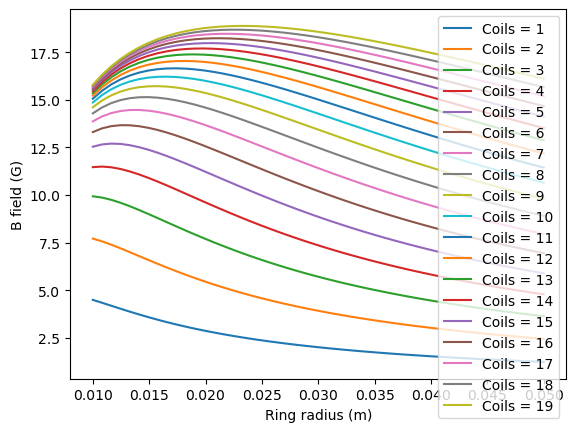

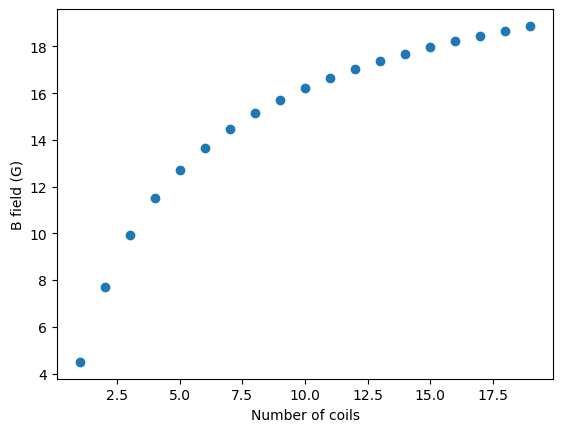

In [17]:
# calculating magnetic field of solenoid at particle
# I'm just calculating field from several current loops and summing them

z = 0.5*10**(-2) # distance of first coil from particle
Bmax = [] # Max field over different solenoid radii
ns = range(1, 20, 1) # Total number of coils
for n in ns:
    B = [] # Field for a range of radii
    for R0 in R:
        B_tmp2 = 0 # Total field for this radii
        for n0 in range(n):
            B_tmp = u0*I*R0**2/2/(R0**2+(z+(n0)*2.5*10**(-3))**2)**(3/2)/10**(-4) # field from coil n0
            B_tmp2 += B_tmp
        B.append(B_tmp2)
    Bmax.append(np.max(B))
    B = np.array(B)
    plt.plot(R, B, label = 'Coils = '+str(n))
plt.legend()
plt.ylabel('B field (G)')
plt.xlabel('Ring radius (m)')
plt.figure()
plt.plot(ns, Bmax, 'o')
plt.ylabel('B field (G)')
plt.xlabel('Number of coils')

Text(0.5, 0, 'Number of coils')

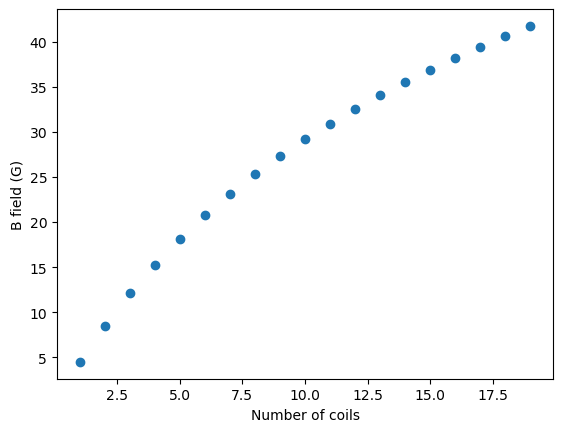

In [18]:
# Now calculating flattened coil
# Same as above just summing fields from individual current loops

z = 0.5*10**(-2) # Distance from particle
ns = range(1, 20, 1)
R0 = 0.01 # Smallest coil radius
B = [] # Magnetic field for each max coil number
for n in ns:
    B_tmp2 = 0
    for n0 in range(n):
        B_tmp = u0*I*(R0+(n0)*2.5*10**(-3))**2/2/((R0+(n0)*2.5*10**(-3))**2+z**2)**(3/2)/10**(-4) # Magnetic field from coil n0
        B_tmp2 += B_tmp
    B.append(B_tmp2)
plt.plot(ns, B, 'o')
plt.ylabel('B field (G)')
plt.xlabel('Number of coils')

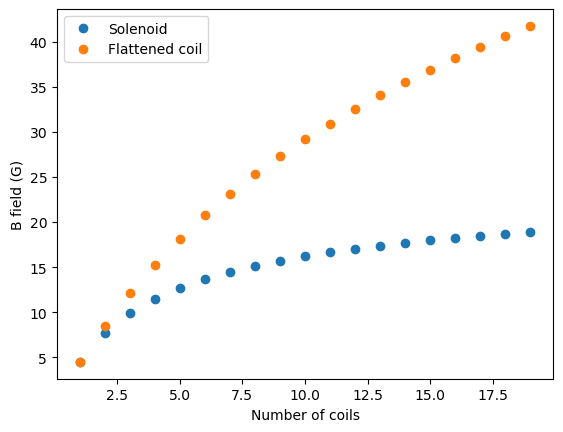

In [19]:
plt.plot(ns, Bmax, 'o', label = 'Solenoid')
plt.plot(ns, B, 'o', label = 'Flattened coil')
plt.ylabel('B field (G)')
plt.xlabel('Number of coils')
plt.legend()

### Lorentz force on particle

In [ ]:
# Response of oscillator to driving field

w0 = 2*np.pi*250000 # central frequency
m = 4/3*np.pi*(83*10**(-9))**3*2200 # mass
B = 10**(-4)*20 # magnetic field in Tesla
q = 1.6*10**(-19)*10 # particle charge
EpV = 120 # electric field per volt
V = 200 # applied voltage
w = np.linspace(40000, 300000, 10**5)*2*np.pi # frequency range
y = 10*2*np.pi # Damping on particle

Fe = V*EpV*q # electric force
Svv = w*Fe/m/np.sqrt((w**2-w0**2)**2+y**2*w**2) # Velocity response in x
SffzB = Svv*q*B # force response in z from lorentz force

In [5]:
# Calculating force sensitivity from measured back action and imprecision

hbar = 1.055*10**(-34)
SI2eV = 5.34428599e-28

R = (0.083)*10**(-6) # Particle Radius
p = 2200 # Particle Denisty
M = 4/3*np.pi*R**3*p # Particle mass

def chi_sq(w, w0, y0, M):
    return M**2*((w0**2-w**2)**2+y0**2*w**2)

w = np.linspace(40000, 300000, 10**5)*2*np.pi

chi_sq1 = chi_sq(w, 60000*2*np.pi, y, M)

c = 3*10**8

Gamma = 3190*2*np.pi # Total reheating
Sba = 2*hbar**2*Gamma/(hbar/2/M/2/np.pi/48000) # Total backaction noise - single sided
k = 2*np.pi/(1.064*10**(-6))
Pscatt = Sba*c/hbar/(0.83**2+0.4)/k/2 # Equivalent scattered power
print(Sba)
print(Pscatt)
Simp = 2*hbar*c/Pscatt/4/k/(0.83**2+0.4)/0.1 # Imprecision noise - I've fiddled around with collection efficiency until I get the measured value
print(Simp)

f = (Simp*chi_sq1 + (Sba+np.zeros(len(w)))) # force sensitivity

1.344156001207369e-41
2.9720919169138153e-06
8.280474877917748e-27


In [6]:
print(8*Gamma*hbar*M*2*np.pi*48000/2)

1.3441560012073692e-41


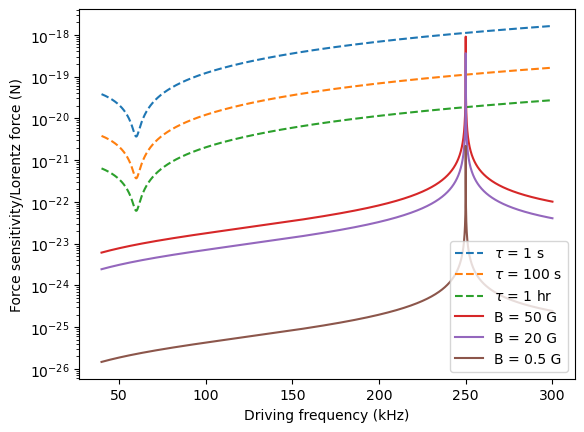

In [7]:
plt.plot(w/2/np.pi/1000, np.sqrt(f), '--', label = r'$\tau$ = 1 s')
plt.plot(w/2/np.pi/1000, np.sqrt(f)/np.sqrt(100), '--', label = r'$\tau$ = 100 s')
plt.plot(w/2/np.pi/1000, np.sqrt(f)/np.sqrt(3600), '--', label = r'$\tau$ = 1 hr')

plt.plot(w/2/np.pi/1000, SffzB*50/20, label = r'B = 50 G')
plt.plot(w/2/np.pi/1000, SffzB, label = r'B = 20 G')
plt.plot(w/2/np.pi/1000, SffzB/8.3/20, label = r'B = 0.5 G')

plt.ylabel('Force sensitivity/Lorentz force (N)')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')
plt.legend()

(248.0, 252.0)

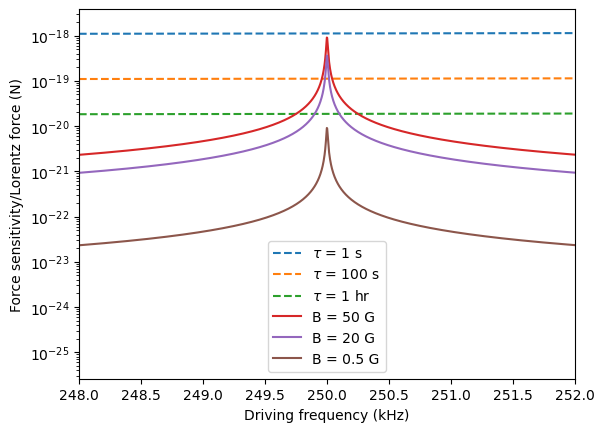

In [8]:
plt.plot(w/2/np.pi/1000, np.sqrt(f), '--', label = r'$\tau$ = 1 s')
plt.plot(w/2/np.pi/1000, np.sqrt(f)/np.sqrt(100), '--', label = r'$\tau$ = 100 s')
plt.plot(w/2/np.pi/1000, np.sqrt(f)/np.sqrt(3600), '--', label = r'$\tau$ = 1 hr')

plt.plot(w/2/np.pi/1000, SffzB*50/20, label = r'B = 50 G')
plt.plot(w/2/np.pi/1000, SffzB, label = r'B = 20 G')
plt.plot(w/2/np.pi/1000, SffzB/20/2, label = r'B = 0.5 G')

plt.yscale('log')
plt.ylabel('Force sensitivity/Lorentz force (N)')
plt.xlabel('Driving frequency (kHz)')
plt.legend()
plt.xlim(248, 252)

In [9]:
w0 = 2*np.pi*215000 # central frequency
m = 4/3*np.pi*(83*10**(-9))**3*2200 # mass
B = 10**(-4)*4000 # magnetic field in Tesla
q = 1.6*10**(-19)*250 # particle charge
EpV = 60 # electric field per volt
V = 10 # applied voltage
w = np.linspace(40000, 300000, 10**5)*2*np.pi # frequency range
y = 10*2*np.pi # Damping on particle

Fe = V*EpV*q # electric force
Svv = w*Fe/np.sqrt(2)/m/np.sqrt((w**2-w0**2)**2+y**2*w**2) # Velocity response in x
Sxx = Svv/w
SffzB = Svv*q*B # force response in z from lorentz force

hbar = 1.055*10**(-34)
SI2eV = 5.34428599e-28

R = (0.083)*10**(-6) # Particle Radius
p = 2200 # Particle Denisty
M = 4/3*np.pi*R**3*p # Particle mass

def chi_sq(w, w0, y0, M):
    return M**2*((w0**2-w**2)**2+y0**2*w**2)

w = np.linspace(40000, 300000, 10**5)*2*np.pi

chi_sq1 = chi_sq(w, 50000*2*np.pi, y, M)
print(SffzB)
c = 3*10**8

Gamma = 6400*2*np.pi # Total reheating
Sba = hbar**2*Gamma/(hbar/2/M/2/np.pi/50000) # Total backaction noise
k = 2*np.pi/(1.064*10**(-6))
Pscatt = Sba*c/hbar/(0.83**2+0.4)/k # Equivalent scattered power
print(Sba)
print(Pscatt)
Simp = hbar*c/Pscatt/4/k/(0.83**2+0.4)/0.1 # Imprecision noise - I've fiddled around with collection efficiency until I get the measured value
print(Simp)
Sba = 10**(-40)
Simp = 10**(-27)

f = (Simp*chi_sq1 + (Sba+np.zeros(len(w)))) # force sensitivity

[7.35144230e-21 7.35195442e-21 7.35246655e-21 ... 5.62094475e-20
 5.62079315e-20 5.62064155e-20]
1.4045517253995495e-41
6.211268373905571e-06
1.981103614541821e-27


In [10]:
10**(5/2)/10**(-1/2)

1000.0000000000001

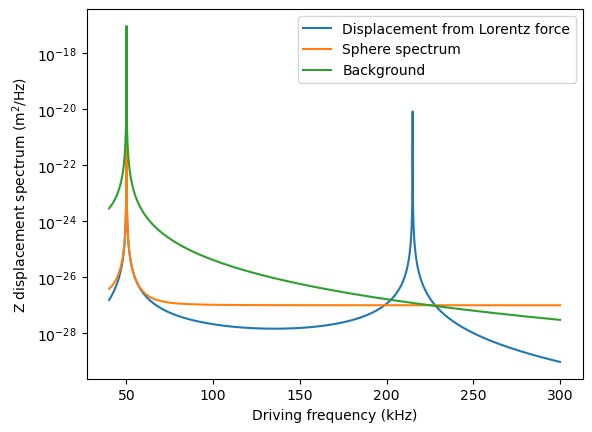

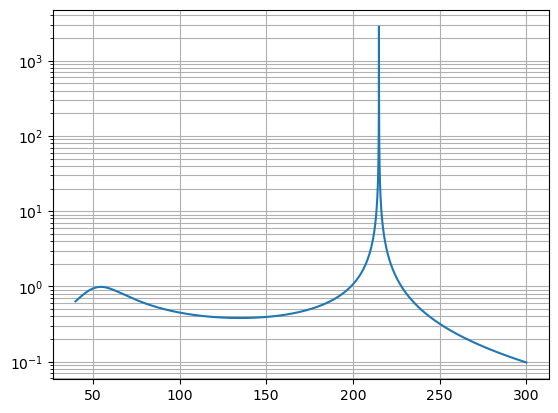

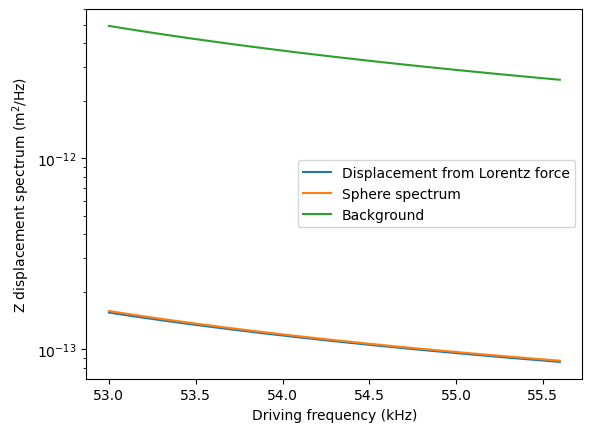

In [11]:
plt.plot(w/2/np.pi/1000, SffzB**2/chi_sq1, label = 'Displacement from Lorentz force')
plt.plot(w/2/np.pi/1000, Simp+(Sba+np.zeros(len(w)))/chi_sq1, label = 'Sphere spectrum')
plt.plot(w/2/np.pi/1000, 1000*(Sba+np.zeros(len(w)))/chi_sq1, label = 'Background')
plt.ylabel('Z displacement spectrum (m$^2$/Hz)')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')
plt.legend()
plt.figure()

plt.plot(w/2/np.pi/1000, np.sqrt((SffzB**2/chi_sq1)/(Simp+(Sba+np.zeros(len(w)))/chi_sq1)))
plt.yscale('log')
plt.grid()
plt.grid(which = 'minor')

plt.figure()

lb = 5000
ub = 6000

plt.plot(w[lb:ub]/2/np.pi/1000, np.sqrt(SffzB[lb:ub]**2/chi_sq1[lb:ub]), label = 'Displacement from Lorentz force')
plt.plot(w[lb:ub]/2/np.pi/1000, np.sqrt(Simp+(Sba+np.zeros(len(w[lb:ub])))/chi_sq1[lb:ub]), label = 'Sphere spectrum')
plt.plot(w[lb:ub]/2/np.pi/1000, np.sqrt(1000*(Sba+np.zeros(len(w[lb:ub])))/chi_sq1[lb:ub]), label = 'Background')
plt.ylabel('Z displacement spectrum (m$^2$/Hz)')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')
plt.legend()

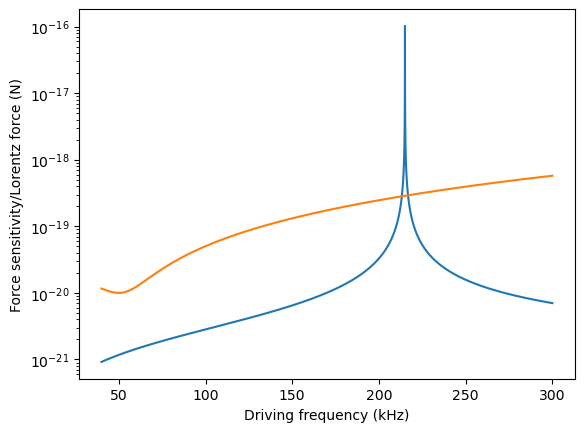

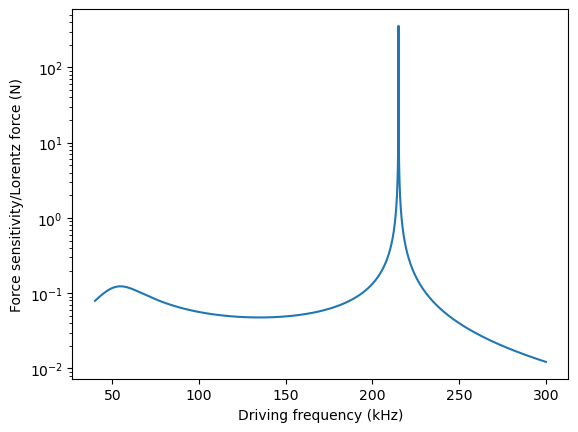

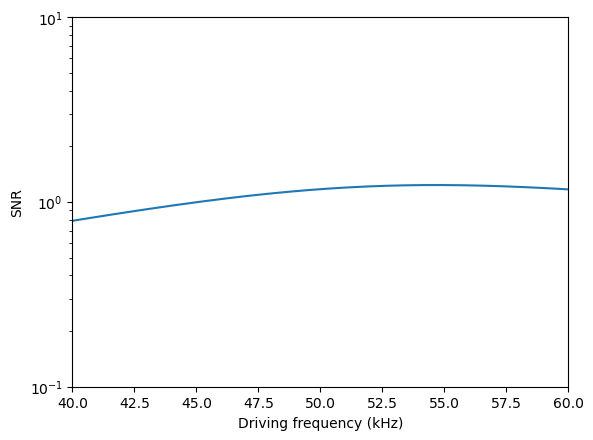

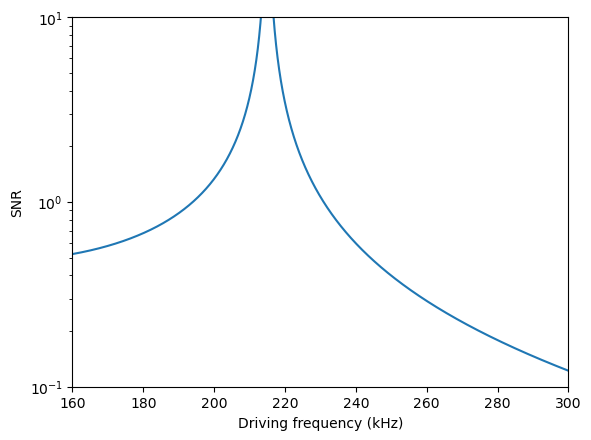

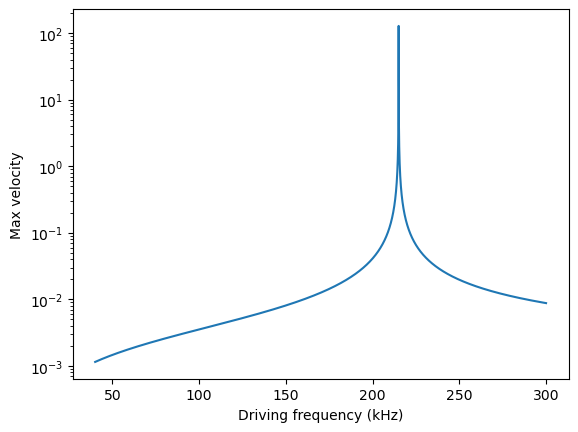

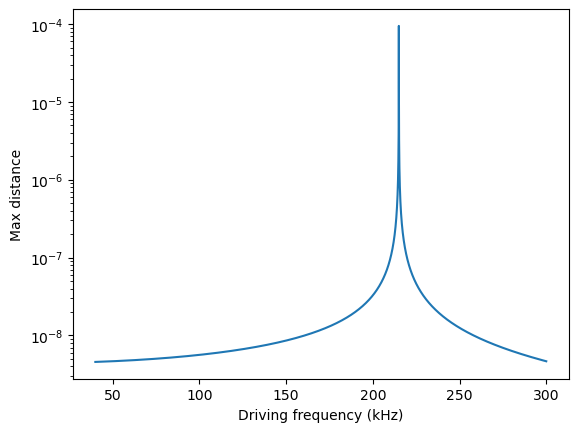

In [22]:


plt.plot(w/2/np.pi/1000, SffzB)
plt.plot(w/2/np.pi/1000, np.sqrt(f))

plt.ylabel('Force sensitivity/Lorentz force (N)')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')
plt.figure()
plt.plot(w/2/np.pi/1000, SffzB/np.sqrt(f))

plt.ylabel('Force sensitivity/Lorentz force (N)')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')
plt.figure()
plt.plot(w/2/np.pi/1000, SffzB/np.sqrt(f)*10)

plt.ylabel('SNR')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')
plt.xlim(40, 60)
plt.ylim(0.1, 10)


plt.figure()
plt.plot(w/2/np.pi/1000, SffzB/np.sqrt(f)*10)

plt.ylabel('SNR')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')
plt.xlim(160, 300)
plt.ylim(0.1, 10)

plt.figure()
plt.plot(w/2/np.pi/1000, Svv)

plt.ylabel('Max velocity')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')

plt.figure()
plt.plot(w/2/np.pi/1000, Sxx)

plt.ylabel('Max distance')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')

(40.0, 60.0)

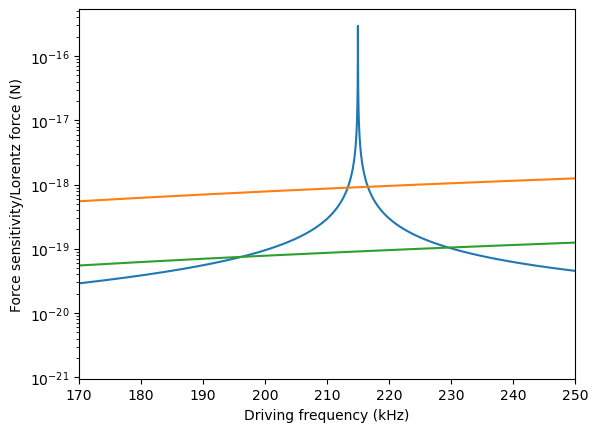

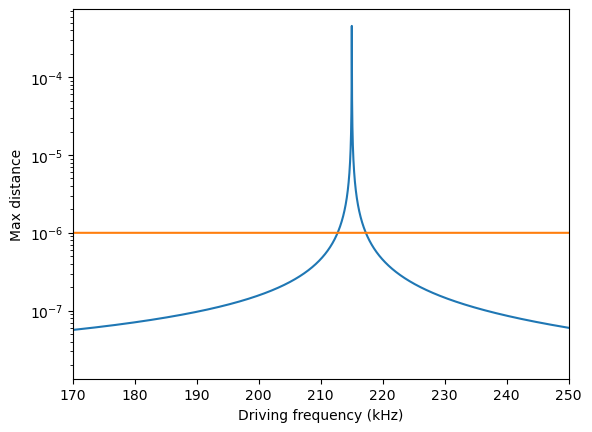

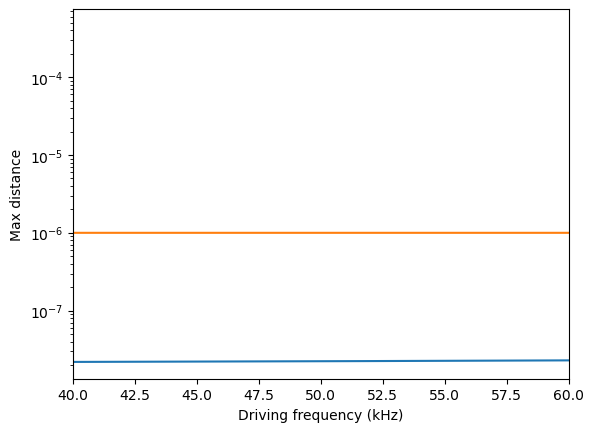

In [91]:

plt.plot(w/2/np.pi/1000, SffzB)
plt.plot(w/2/np.pi/1000, np.sqrt(f))
plt.plot(w/2/np.pi/1000, np.sqrt(f)/np.sqrt(100))

plt.ylabel('Force sensitivity/Lorentz force (N)')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')

plt.xlim(170, 250)

plt.figure()
plt.plot(w/2/np.pi/1000, Sxx)
plt.plot(w/2/np.pi/1000, np.zeros(len(w))+10**(-6))

plt.ylabel('Max distance')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')

plt.xlim(170, 250)

plt.figure()
plt.plot(w/2/np.pi/1000, Sxx)
plt.plot(w/2/np.pi/1000, np.zeros(len(w))+10**(-6))

plt.ylabel('Max distance')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')

plt.xlim(40, 60)

In [28]:
np.sqrt(300*1.38*10**(-23)/m/(2*np.pi*50000)**2)

8.922314227744743e-08

In [29]:
w0 = 2*np.pi*50000 # central frequency
m = 4/3*np.pi*(83*10**(-9))**3*2200 # mass
B = 10**(-4)*200 # magnetic field in Tesla
q = 1.6*10**(-19)*40 # particle charge
EpV = 120 # electric field per volt
V = 60 # applied voltage
w = np.linspace(20000, 100000, 10**5)*2*np.pi # frequency range
y = 10000*2*np.pi # Damping on particle

Fe = V*EpV*q # electric force
Svv = w*Fe/m/np.sqrt((w**2-w0**2)**2+y**2*w**2) # Velocity response in x
Sxx = Svv/w

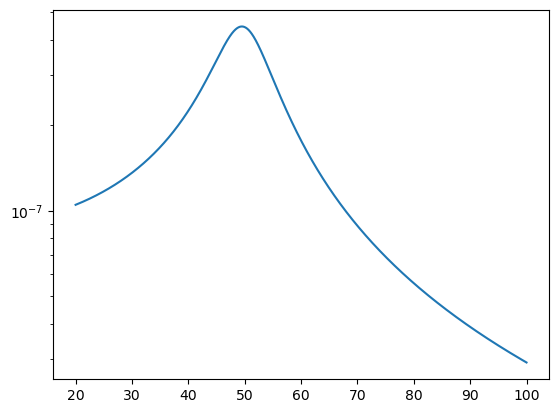

In [31]:
plt.plot(w/2/np.pi/1000, Sxx)
plt.yscale('log')

In [1]:
# Want to try and produce some graphs of displacement to get an idea of what these will actually look like

In [2]:
import sys
import scipy.signal as scisig

sys.path.insert(1, 'C:/Users/thoma/Documents/SIMPLE/Nanoparticle/Scripts/Simulations/SIMPLE_impulsesimulations')

import simulation_utils as su

In [60]:
P = 5*10**(-8) # Pressure in mbar
T = 293 # Environmental temperature
R = (0.083)*10**(-6) # Particle Radius
p = 2200 # Particle Denisty
M = 4/3*np.pi*R**3*p # Particle mass
kb = 1.38*10**(-23) # Boltzmann constant
m = 29*1.67*10**(-27) # average mass of air particles
v = np.sqrt(8*1.38*10**(-23)*T/(np.pi*m)) # velocity of air particles
N0 = 2.43*10**(25) # Number density of air and ambient pressure
P0 = 1000 # Ambient pressure
N=N0*P/P0 # Number density of air at pressure P

y = (1+np.pi/8)*(4/3*np.pi)*(m*v*N*R**2)/(M) # Damping from air
print(y)


0.00020693475586909798


In [61]:
M = 4/3*np.pi*(83*10**(-9))**3*2200 # Particle mass
T = 293 # Temperature

tff = np.zeros(50000)
noisef = np.zeros(50000)

np.random.seed(85655219)
random_nums = np.random.uniform(0, 1000000, 3000)

ws = np.linspace(0, 500000, 50000)*2*np.pi

random_w0 = np.random.normal(1, 0.002, 1000)

for i in range(1000):
    randomlist, randomlist2, randomlist3 = su.generate_random_numbers(random_nums[3*i:3*(i+1)], (10**(-26)), 100000, 500000)
    tf = su.transfer_function2(ws, 50000*2*np.pi, 3.5*10**(-3), 10*2*np.pi, randomlist[:50000], randomlist2[:50000], M, T)
    PSD_noise = scisig.welch(randomlist3, fs = 10**6, nperseg = 10**5)
    tff += np.abs(tf)**2
    noisef += PSD_noise[1][1:]
tff /= 1000
noisef /= 1000

NameError: name 'su' is not defined

In [66]:
np.sqrt(4*kb*T*M*3.5*10**(-3))

1.7270708529988894e-20

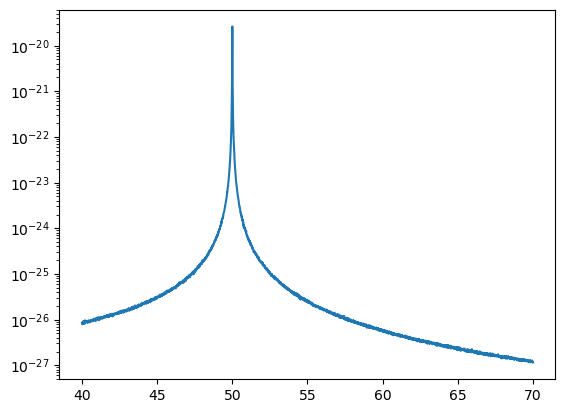

In [58]:
lb = 4000
ub = 7000
plt.plot(ws[lb:ub]/2/np.pi/1000, tff[lb:ub])#+noisef[lb:ub])
plt.yscale('log')

In [66]:
# Response of oscillator to driving field

w0 = 2*np.pi*215000 # central frequency
m = 4/3*np.pi*(83*10**(-9))**3*2200 # mass
B = 10**(-4)*200 # magnetic field in Tesla
q = 1.6*10**(-19)*100 # particle charge
EpV = 59.4 # electric field per volt
V = 25 # applied voltage
wdr = 53000*2*np.pi # frequency range
y = 10*2*np.pi # Damping on particle
wz = 50000*2*np.pi
SzzB = np.zeros(len(ws))
for wdr in [wz+3000*2*np.pi, wz-3000*2*np.pi]:
    
    print(wdr/2/np.pi)
    Fe = V*EpV*q # electric force
    Svv = wdr*Fe/m/np.sqrt(2)/np.sqrt((wdr**2-w0**2)**2+y**2*wdr**2) # Velocity response in x
    SffzB = Svv*q*B # force response in z from lorentz force
    print(SffzB)

    SzzB_wdr = SffzB**2/m**2/((wdr**2-wz**2)**2+(y**2*wdr**2)) # displacement response in z from lorentz force
    
    print(int(wdr/2/np.pi/10))
    SzzB[int(wdr/2/np.pi/10)] = SzzB_wdr
    print(SzzB_wdr)

52999.99999999999
1.9823577918696977e-22
5299
9.511198376380225e-30
47000.0
1.7339767344405185e-22
4700
8.205193235008535e-30


In [68]:
np.sqrt(10**(-29))

3.1622776601683794e-15

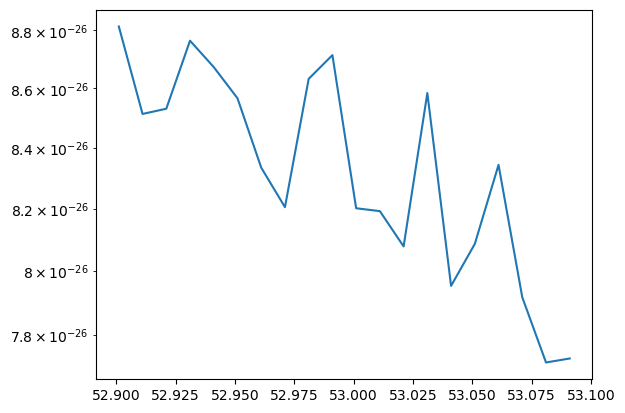

In [65]:
lb = 5290
ub = 5310
plt.plot(ws[lb:ub]/2/np.pi/1000, tff[lb:ub]+noisef[lb:ub]+SzzB[lb:ub])
plt.yscale('log')

In [104]:
w0 = 2*np.pi*215000 # central frequency
m = 4/3*np.pi*(83*10**(-9))**3*2200 # mass
B = 10**(-4)*200 # magnetic field in Tesla
q = 1.6*10**(-19)*150 # particle charge
EpV = 59.4 # electric field per volt
V = 10 # applied voltage
wdr = 53000*2*np.pi # frequency range
y = 10*2*np.pi # Damping on particle
wz = 50000*2*np.pi
wdrs = np.linspace(42000, 58000, 17)*2*np.pi
SzzBs = []
SzzEs = []
SzzOscs = []
for wdr in wdrs:
    Fe = V*EpV*q # electric force
    Svv = wdr*Fe/m/np.sqrt(2)/np.sqrt((wdr**2-w0**2)**2+y**2*wdr**2) # Velocity response in x
    SffzB = Svv*q*B # force response in z from lorentz force
    SzzB_wdr = np.sqrt(SffzB**2/m**2/((wdr**2-wz**2)**2+(y**2*wdr**2))) # displacement response in z from lorentz force
    SzzBs.append(SzzB_wdr)
    Fe2 = 0.003*10*q
    SzzE = Fe2/m/np.sqrt(2)/np.sqrt((wdr**2-wz**2)**2+y**2*wdr**2)
    SzzEs.append(SzzE)
    SzzOsc = 0.85*np.sqrt(3*10**(-40)/m**2/((wdr**2-wz**2)**2+(y**2*wdr**2))+10**(-26))
    SzzOscs.append(SzzOsc)

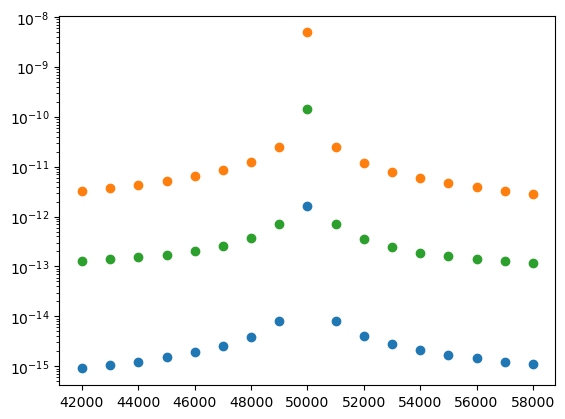

In [105]:
plt.plot(wdrs/2/np.pi, SzzBs, 'o')
plt.plot(wdrs/2/np.pi, SzzEs, 'o')
plt.plot(wdrs/2/np.pi, np.array(SzzOscs), 'o')
plt.yscale('log') 

In [103]:
sum(np.array(SzzBs[:8]) - np.array(SzzBs[9:][::-1]))

-2.37489782693546e-14

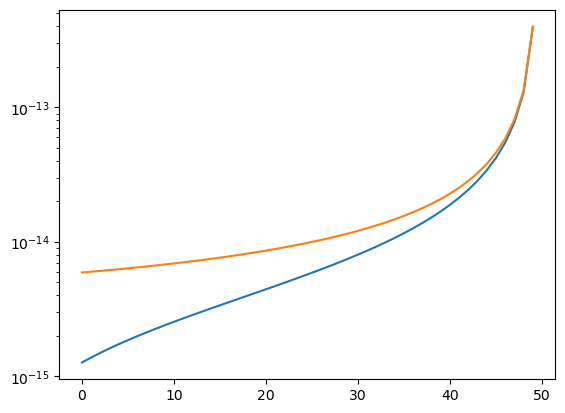

In [57]:
plt.plot(np.array(SzzBs[:50]))
plt.plot(SzzBs[50:][::-1])
plt.yscale('log')

In [58]:
-(np.array(SzzBs[:50])-np.array(SzzBs[50:][::-1]))/np.array(SzzBs[50:][::-1])

array([0.78570711, 0.7697742 , 0.75398885, 0.73834044, 0.72281868,
       0.70741362, 0.69211555, 0.67691505, 0.66180289, 0.64677008,
       0.63180778, 0.61690734, 0.6020602 , 0.58725797, 0.57249232,
       0.55775501, 0.54303785, 0.52833269, 0.51363142, 0.49892591,
       0.48420802, 0.46946957, 0.45470234, 0.43989803, 0.42504825,
       0.41014449, 0.39517814, 0.3801404 , 0.36502233, 0.34981478,
       0.33450838, 0.31909352, 0.30356033, 0.28789865, 0.27209799,
       0.2561475 , 0.24003596, 0.22375173, 0.20728271, 0.19061631,
       0.17373941, 0.1566383 , 0.13929865, 0.12170545, 0.10384295,
       0.08569459, 0.06724296, 0.04846968, 0.02935533, 0.00987886])

In [11]:
import scipy.io as sio

path = 'D:/Lab Data/lorentz_force/sphere_20250321/20250324/Charge/'
files = ['10mVnoamp87kHz3.8e-8mbarchannelD']
end = '.mat'
filename = path + files[0] + end
data = sio.loadmat(filename)
tt = np.transpose(data['D'])[0]
dt = data['Tinterval'][0][0]
PSD = scisig.welch(tt[:10**6], fs=int(1/dt), nperseg=int(1/dt/10))

In [14]:
PSD[1][8700]*10**(-14)

9.07040720310448e-24

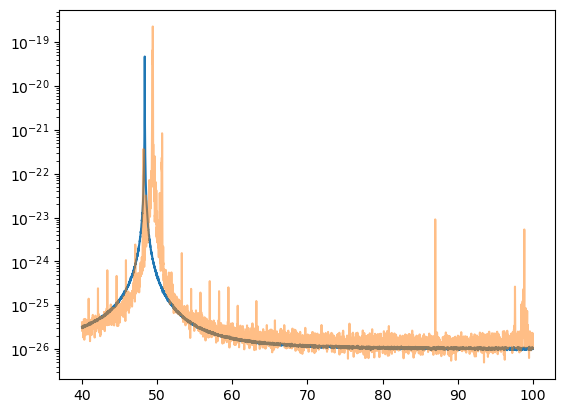

In [476]:
lb = 4000
ub = 10000
lb2 = int(lb/1)
ub2 = int(ub/1)
plt.plot(ws[lb:ub]/2/np.pi/1000, tff[lb:ub]+noisef[lb:ub]+SzzB[lb:ub])
plt.plot(PSD[0][lb2:ub2]/1000, PSD[1][lb2:ub2]*10**(-14), alpha = 0.5)
plt.yscale('log')

In [339]:
path = 'D:/Lab Data/Devices/Noise/FalcoRIGOL'
end = '.mat'
filename = path + end
data = sio.loadmat(filename)
tt = np.transpose(data['G'])[0]
dt = data['Tinterval'][0][0]
PSD = scisig.welch(tt, fs=int(1/dt), nperseg=int(1/dt/10))

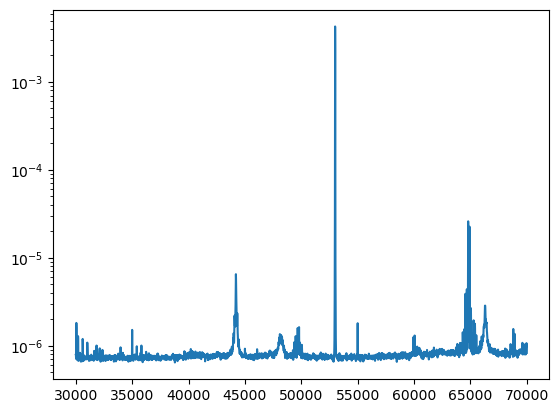

In [341]:
plt.plot(PSD[0][3000:7000], np.sqrt(PSD[1][3000:7000]))
plt.yscale('log')

In [338]:
120*0.1/25*10**(-6)*1.6*10**(-19)*100

7.68e-24

In [27]:
import numpy as np

q= 80*1.6*10**(-19)
E = 0.38
F = q*E
m = 4/3*np.pi*(83*10**(-9))**3*2200 # Particle mass
w0 = 2*np.pi*48000 # central frequency
wdr = 87000*2*np.pi # driving frequency
y = 1*2*np.pi # Damping on particle

print(F**2/2/m**2/((wdr**2-w0**2)**2+(y**2*wdr**2)))

9.861654379109272e-24


In [22]:
E

0.6900000000000001

In [84]:
# AC field so shift down velocity spectrum

In [89]:
w[w/2/np.pi > 264000]

array([1658761.17242534, 1658777.5088705 , 1658793.84531566, ...,
       1884922.91926355, 1884939.25570871, 1884955.59215388])

In [102]:
w0 = 2*np.pi*215000 # central frequency
wshift = 150000
m = 4/3*np.pi*(83*10**(-9))**3*2200 # mass
B = 10**(-4)*0.5 # magnetic field in Tesla
q = 1.6*10**(-19)*150 # particle charge
EpV = 60 # electric field per volt
V = 200 # applied voltage
w = np.linspace(40000, 300000, 10**5)*2*np.pi # frequency range
y = 10*2*np.pi # Damping on particle

Fe = V*EpV*q # electric force
Svv = w*Fe/np.sqrt(2)/m/np.sqrt((w**2-w0**2)**2+y**2*w**2) # Velocity response in x
Sxx = Svv/w
SffzB = Svv[w/2/np.pi > wshift]*q*B # force response in z from lorentz force, just looks at things down shifted by 264000 Hz

hbar = 1.055*10**(-34)
SI2eV = 5.34428599e-28

R = (0.083)*10**(-6) # Particle Radius
p = 2200 # Particle Denisty
M = 4/3*np.pi*R**3*p # Particle mass

def chi_sq(w, w0, y0, M):
    return M**2*((w0**2-w**2)**2+y0**2*w**2)

w = np.linspace(40000, 300000, 10**5)*2*np.pi

chi_sq1 = chi_sq(w, 50000*2*np.pi, y, M)
print(SffzB)
c = 3*10**8

Gamma = 6400*2*np.pi # Total reheating
Sba = hbar**2*Gamma/(hbar/2/M/2/np.pi/50000) # Total backaction noise
k = 2*np.pi/(1.064*10**(-6))
Pscatt = Sba*c/hbar/(0.83**2+0.4)/k # Equivalent scattered power
print(Sba)
print(Pscatt)
Simp = hbar*c/Pscatt/4/k/(0.83**2+0.4)/0.1 # Imprecision noise - I've fiddled around with collection efficiency until I get the measured value
print(Simp)
Sba = 10**(-40)
Simp = 10**(-27)

f = (Simp*chi_sq1 + (Sba+np.zeros(len(w)))) # force sensitivity

[4.66696209e-23 4.66719643e-23 4.66743079e-23 ... 5.05885028e-23
 5.05871383e-23 5.05857740e-23]
1.4045517253995495e-41
6.211268373905571e-06
1.981103614541821e-27


ValueError: operands could not be broadcast together with shapes (57692,) (100000,) 

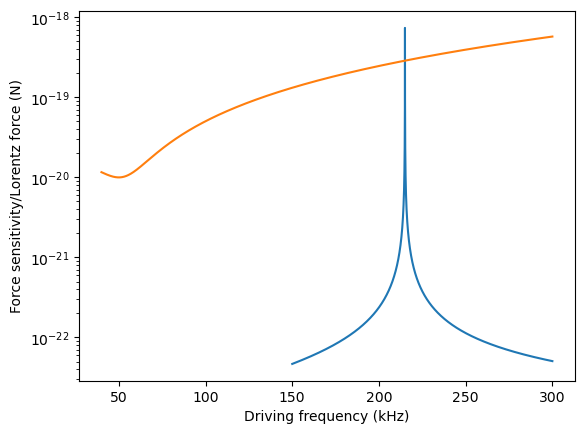

<Figure size 640x480 with 0 Axes>

In [103]:


plt.plot(w[w/2/np.pi > wshift]/2/np.pi/1000, SffzB)
plt.plot(w/2/np.pi/1000, np.sqrt(f))

plt.ylabel('Force sensitivity/Lorentz force (N)')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')
plt.figure()
plt.plot(w[w/2/np.pi > wshift]/2/np.pi/1000, SffzB/np.sqrt(f))

plt.ylabel('Force sensitivity/Lorentz force (N)')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')


In [ ]:
plt.figure()
plt.plot(w/2/np.pi/1000, SffzB/np.sqrt(f)*10)

plt.ylabel('SNR')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')
plt.xlim(40, 60)
plt.ylim(0.1, 10)


plt.figure()
plt.plot(w/2/np.pi/1000, SffzB/np.sqrt(f)*10)

plt.ylabel('SNR')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')
plt.xlim(160, 300)
plt.ylim(0.1, 10)

plt.figure()
plt.plot(w/2/np.pi/1000, Svv)

plt.ylabel('Max velocity')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')

plt.figure()
plt.plot(w/2/np.pi/1000, Sxx)

plt.ylabel('Max distance')
plt.xlabel('Driving frequency (kHz)')
plt.yscale('log')